# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [11]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS = "Capitulo_3/drug200.csv"

In [3]:
# Visualiza el DataFrame
df = pd.read_csv(DOWNLOAD_ROOT + MEDICAMENTOS)

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.min()

Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           DrugY
dtype: object

In [10]:
df.max()

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugX
dtype: object

## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

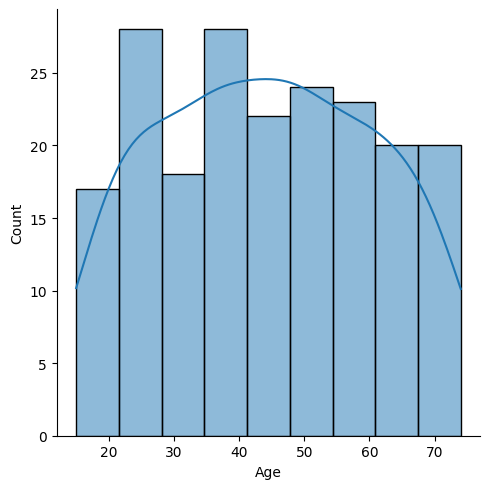

In [12]:
#Graficar la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True) # kernel density estimation

In [13]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [14]:
# Crea una gráfica de barras para Presión Sanguinea
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

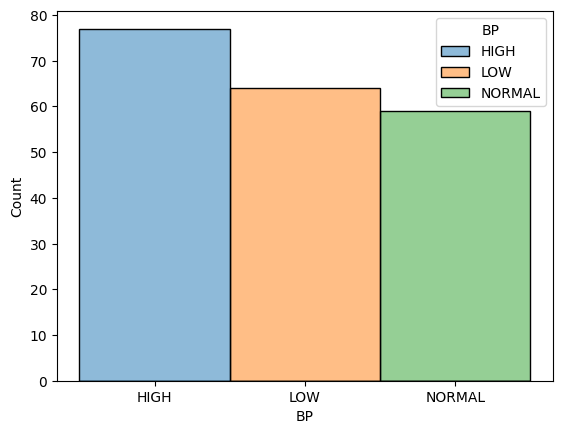

In [22]:
# Crea una gráfica de barras para Colesterol
# plt.figure(figsize=(9,5))
sns.histplot(data=df, x="BP", hue="BP") # hue ->color

In [23]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

<Axes: xlabel='Na_to_K', ylabel='Count'>

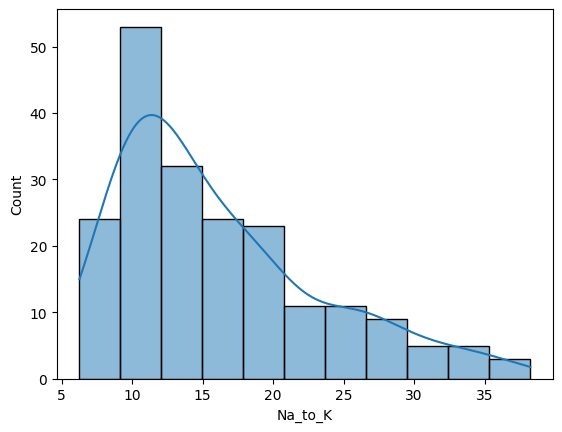

In [24]:
# Crea un displot para Sodio Potasio
sns.histplot(df.Na_to_K , kde=True)

<Axes: xlabel='Drug', ylabel='Count'>

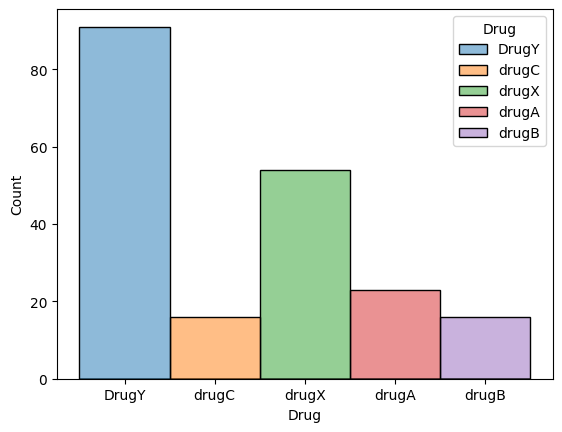

In [25]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
sns.histplot(df, x="Drug", hue="Drug")

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


In [11]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊


In [12]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

#Grafica la tablita anterior con una gráfica de barras


In [13]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊


In [14]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊


In [15]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [16]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc



In [17]:
# Crear set de entrenamiento y set de prueba


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [18]:
## Crear modelo para medicamento


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [19]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)



In [20]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [21]:
# Realiza una Cross validation/K-Folds


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [22]:
# Modelo que nunca es Y


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [23]:
# Matriz de confusión
#Importar cross_val_predict 

#Importar confusion_matrix


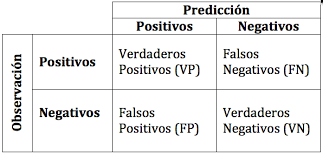

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [24]:
#Importar precision_score y recall_score 


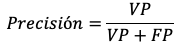

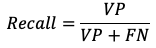

In [25]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez


In [26]:
#Calcular la precisión y recall con el nuevo clasificador 


In [27]:
#Calcular F1


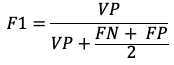

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [28]:
#Puntación de un paciente aleatorio


In [29]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [30]:
#Supon que ya lo pensaste y querías un umbral  90 


In [31]:
#Arroja la precisión y recall para un umbral de 90


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [32]:
#Importar roc_curve


In [33]:
#Graficar la curva ROC

#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [34]:
#Calcular el puntaje de la curva


In [35]:
#Compararlo con el modelo de random forest


In [36]:
#Graficar la curva ROC y la predicción de random forest 


In [37]:
#Calcular el puntaje (área bajo la curva) de random forest  


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [38]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 


In [39]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje

In [40]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador


In [41]:
#Utilizar decision_function para observar los puntajes de cada medicina 


In [42]:
#campararlo con los datos obtenidos de sgd.fit 


***

## <span style="color:green">8. Analizar Errores</span>

In [43]:
#Hacer un clasificador de random forest


In [44]:
#Utilizar la matriz de confusión 


In [45]:
#utilizar ahora SGD
